In [1]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

csv_path =  "archived/dataset.csv"
df = pd.read_csv(csv_path)

#Prints the csv file
print(df.head())


          label  number_of_files
0  brain_glioma             2004
1   brain_menin             2004
2   brain_tumor             2048


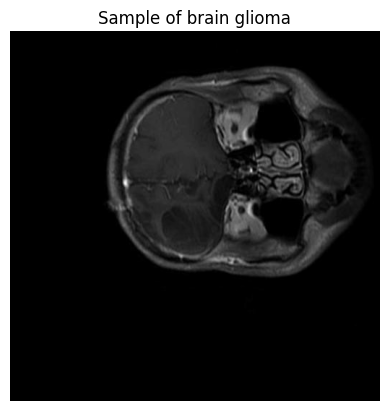

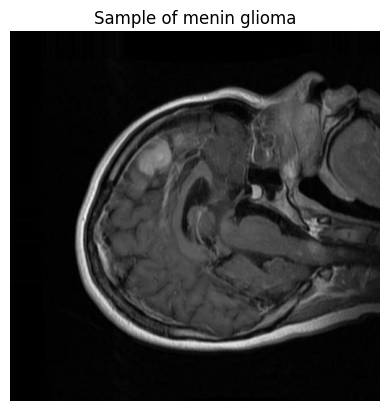

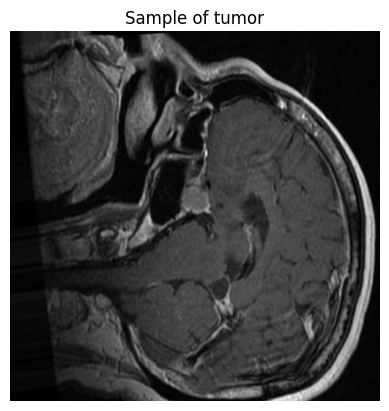

In [2]:
#Shows the user samples of the data

images_glioma_path = "archived/Brain_Cancer raw MRI data/Brain_Cancer/brain_glioma"
images_menin_path = "archived/Brain_Cancer raw MRI data/Brain_Cancer/brain_menin"
images_tumor_path = "archived/Brain_Cancer raw MRI data/Brain_Cancer/brain_tumor"

glioma_img_path = os.path.join(images_glioma_path, os.listdir(images_glioma_path)[0])
glioma_img = Image.open(glioma_img_path)

plt.imshow(glioma_img)
plt.title("Sample of brain glioma")
plt.axis('off')
plt.show()

menin_img_path = os.path.join(images_menin_path, os.listdir(images_menin_path)[0])
menin_img = Image.open(menin_img_path)

plt.imshow(menin_img)
plt.title("Sample of menin glioma")
plt.axis('off')
plt.show()

tumor_img_path = os.path.join(images_tumor_path, os.listdir(images_tumor_path)[0])
tumor_img = Image.open(tumor_img_path)

plt.imshow(tumor_img)
plt.title("Sample of tumor")
plt.axis('off')
plt.show()



In [3]:
image_size = (128, 128)

# Lists to hold image data and labels
X = []
y = []

# Function to load and preprocess images
def load_images(folder_path, label):
    print(f"Loading from: {folder_path}")
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(img_path).convert("RGB")
            img = img.resize(image_size)
            X.append(np.array(img) / 255.0)  # Normalize
            y.append(label)
        except Exception as e:
            print(f"Skipped: {img_path} — Error: {e}")

# Load images from each folder
load_images(images_glioma_path, 0)  # Label 0 = Glioma
load_images(images_menin_path, 1)   # Label 1 = Meningioma
load_images(images_tumor_path, 2)   # Label 2 = Pituitary Tumor

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Check data status
print("✅ Total images loaded:", len(X))
if len(X) > 0:
    print("Sample image shape:", X[0].shape)
else:
    print("⚠️ No images loaded. Check paths and formats.")

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("🧠 Training set size:", len(X_train))
print("🧪 Validation set size:", len(X_val))

Loading from: archived/Brain_Cancer raw MRI data/Brain_Cancer/brain_glioma
Loading from: archived/Brain_Cancer raw MRI data/Brain_Cancer/brain_menin
Loading from: archived/Brain_Cancer raw MRI data/Brain_Cancer/brain_tumor
✅ Total images loaded: 6056
Sample image shape: (128, 128, 3)
🧠 Training set size: 4844
🧪 Validation set size: 1212


In [9]:
from tensorflow.keras import Input

y_train_cat = to_categorical(y_train, num_classes=3)
y_val_cat = to_categorical(y_val, num_classes=3)



model = Sequential([
    Input(shape=(128, 128, 3)),  # Explicit input layer

    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes
])

model.compile(
    optimizer='adam',loss='categorical_crossentropy',  metrics=['accuracy']
)

    

In [10]:
model.fit(X_train, y_train_cat, validation_data=(X_val, y_val_cat), epochs=10, batch_size=32)

Epoch 1/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 33s 176ms/step - accuracy: 0.5775 - loss: 0.9014 - val_accuracy: 0.7351 - val_loss: 0.6098
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - accuracy: 0.7547 - loss: 0.5990 - val_accuracy: 0.7640 - val_loss: 0.5457
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 20s 132ms/step - accuracy: 0.7968 - loss: 0.4983 - val_accuracy: 0.7682 - val_loss: 0.5312
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.8427 - loss: 0.4117 - val_accuracy: 0.7863 - val_loss: 0.5281
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 23s 152ms/step - accuracy: 0.8459 - loss: 0.3811 - val_accuracy: 0.8102 - val_loss: 0.4821
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 22s 147ms/step - accuracy: 0.8814 - loss: 0.3043 - val_accuracy: 0.7830 - val_loss: 0.5565
Epoch 7/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.9045 - loss: 0.2423 - val_accuracy: 0.8185 - val_loss: 0.4905
Epoch 8/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - accuracy: 0.9210 - loss: 0